Problem Statement : Implement a KNN model to classify the animals in to categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Importing the dataset

In [2]:
zoo = pd.read_csv("G:/data sceince/Assignments/KNN/Zoo.csv")

In [3]:
# Getting First 5 rows
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Peforming necessary EDA 

In [4]:
# Checking for null values and the datatypes
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [18]:
# As 'Type' column is our Y variable we will check the unique values
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

Inference: From this we can infer that there there 7 class types of animals  

In [19]:
# Checking how many animals belongs to each and every type
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

Inference : We can see that 41 animals belongs to class type 1, 20 animals belongs to class type 2, 13 animals belongs to class type 3 and so on...

In [27]:
# Checking for no. of rows and columns 
zoo.shape

(101, 18)

In [45]:
# Visualizing the unique class types values

[]

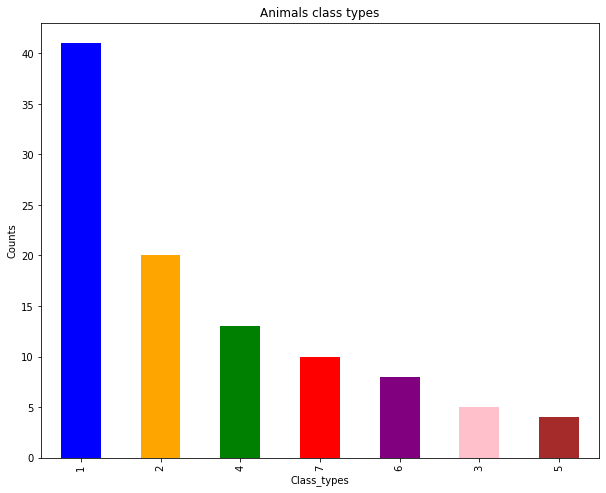

In [54]:
c = ['Blue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']
fig = plt.figure(figsize = (10,8))
zoo.type.value_counts().plot(kind = "bar", color = c)
plt.title("Animals class types")
plt.xlabel("Class_types")
plt.ylabel("Counts")
plt.plot()

Inference : From this we can infer that most of the animals belongs to class type 1 and very less animals belongs to class type 5

In [ ]:
# We will see how many animals are domestic 

[]

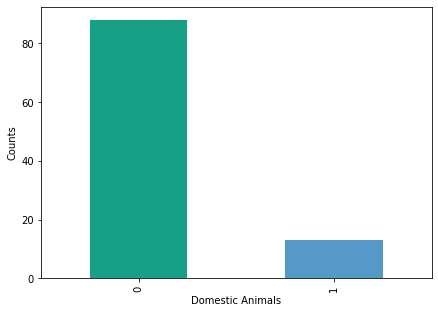

In [97]:
fig = plt.figure(figsize = (7,5))
c = ["#16A085","#5499C7"]
zoo.domestic.value_counts().plot(kind = "bar", color = c)
plt.xlabel("Domestic Animals")
plt.ylabel("Counts")
plt.plot()

Inference : From this we can infer that very less animals are domestic, 1 represents the domestic animals and 0 represents the non domestic animals 

[]

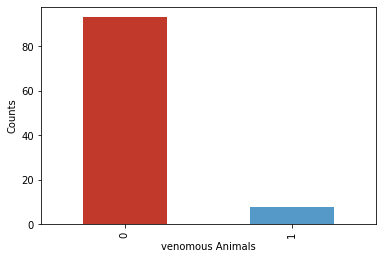

In [98]:
c = ["#C0392B","#5499C7"]
zoo.venomous.value_counts().plot(kind = "bar", color = c)
plt.xlabel("venomous Animals")
plt.ylabel("Counts")
plt.plot()

Inference : From this we can infer that very less animals are venomous, 1 represents the venomous animals and 0 represents the non venomous animals 

[]

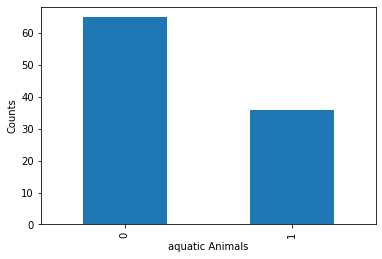

In [60]:
zoo.aquatic.value_counts().plot(kind = "bar")
plt.xlabel("aquatic Animals")
plt.ylabel("Counts")
plt.plot()


[]

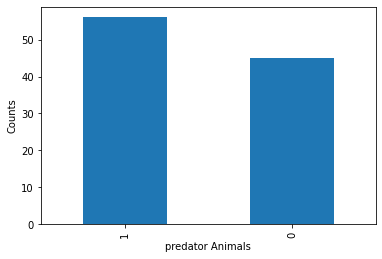

In [61]:
zoo.predator.value_counts().plot(kind = "bar")
plt.xlabel("predator Animals")
plt.ylabel("Counts")
plt.plot()

In [63]:
# Visualizing species wise domestic and non domestic animals 

<AxesSubplot:xlabel='type'>

<Figure size 720x576 with 0 Axes>

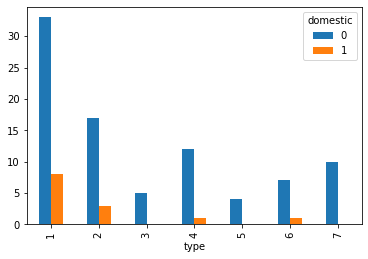

In [64]:
figure = plt.figure(figsize = (10,8))
pd.crosstab(zoo.type, zoo.domestic).plot(kind = "bar")

Inference : From this we can infer that class 1 has more no. of domestic animals 

In [66]:
# Checking how many animals gives us milk 
zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

Inference : We can infer that 41 animals gives us milk  

In [67]:
# Checking for the animals who are providing milk belongs to which class 
pd.crosstab(zoo.type, zoo.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


Inference : All the animals belonging to class 1 provides milk

<AxesSubplot:xlabel='type'>

<Figure size 720x576 with 0 Axes>

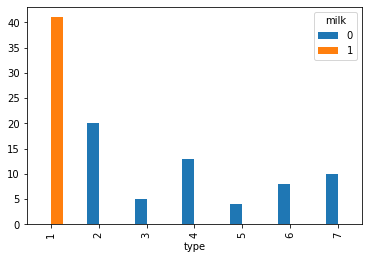

In [76]:
# Visualization of the same
figure = plt.figure(figsize = (10,8))
pd.crosstab(zoo.type, zoo.milk).plot(kind = "bar")

In [68]:
zoo.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [71]:
pd.crosstab(zoo.type, zoo.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


Class types 3,4,5,6,7 contains both venomous and non venomous animals 

<AxesSubplot:xlabel='type'>

<Figure size 720x576 with 0 Axes>

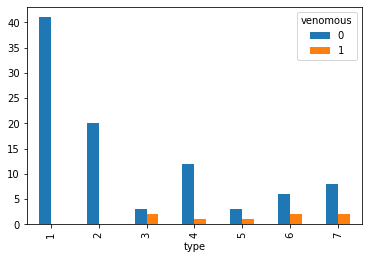

In [77]:
figure = plt.figure(figsize = (10,8))
pd.crosstab(zoo.type, zoo.venomous).plot(kind = "bar")

In [70]:
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [72]:
pd.crosstab(zoo.type, zoo.aquatic)

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,4
6,8,0
7,4,6


<AxesSubplot:xlabel='type'>

<Figure size 720x576 with 0 Axes>

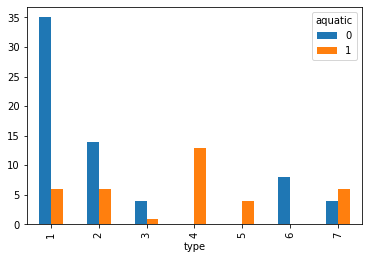

In [78]:
figure = plt.figure(figsize = (10,8))
pd.crosstab(zoo.type, zoo.aquatic).plot(kind = "bar")

In [74]:
zoo.predator.value_counts()

1    56
0    45
Name: predator, dtype: int64

In [75]:
pd.crosstab(zoo.type, zoo.predator)

predator,0,1
type,,
1,19,22
2,11,9
3,1,4
4,4,9
5,1,3
6,7,1
7,2,8


<AxesSubplot:xlabel='type'>

<Figure size 720x576 with 0 Axes>

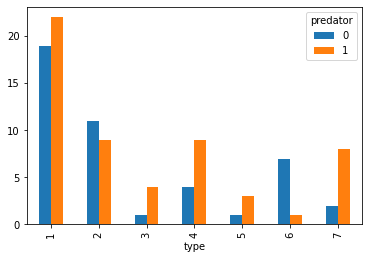

In [79]:
figure = plt.figure(figsize = (10,8))
pd.crosstab(zoo.type, zoo.predator).plot(kind = "bar")

#### Building the model

In [3]:
# Splitting the data 
X= zoo.iloc[:, 1: 17]

In [4]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
Y = zoo.iloc[:, 17]
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [32]:
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

In [33]:
model1.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [34]:
y_preds = model1.predict(x_test)
y_preds

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_preds,y_test)

In [37]:
accuracy

0.9615384615384616

Accuracy of the model is 96.15%

#### Grid Search CV method for determining best K value

In [20]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [21]:
neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = neighbors)

In [22]:
model_grid = KNeighborsClassifier()
grid = GridSearchCV(estimator = model_grid, param_grid = param_grid)
grid.fit(X,Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


#### After getting the best K value building the model to check any changes in accuracy.

In [38]:
model2 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')

In [39]:
model2.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [41]:
y_preds1 = model2.predict(x_test)

In [42]:
y_preds1

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [45]:
accuracy1 = accuracy_score(y_test, y_preds1)
accuracy1

1.0

Inference : we are getting accuracy as 100 percent 